In [1]:
import os

import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from PIL import Image

### Data Exploration

In [2]:
label_df = pd.read_csv('./Messidor/labels/messidor_data.csv')

In [3]:
label_df.tail()

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
1743,IM004806.JPG,0.0,0.0,1
1744,IM004811.JPG,1.0,0.0,1
1745,IM004812.JPG,2.0,0.0,1
1746,IM004831.JPG,0.0,0.0,1
1747,IM004832.JPG,0.0,0.0,1


#### DR Class Counts

<AxesSubplot:>

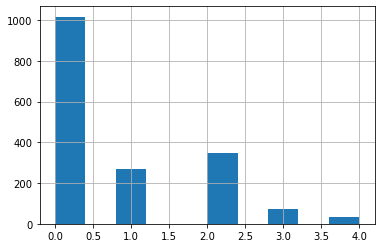

In [4]:
label_df['adjudicated_dr_grade'].hist()

#### Sample images

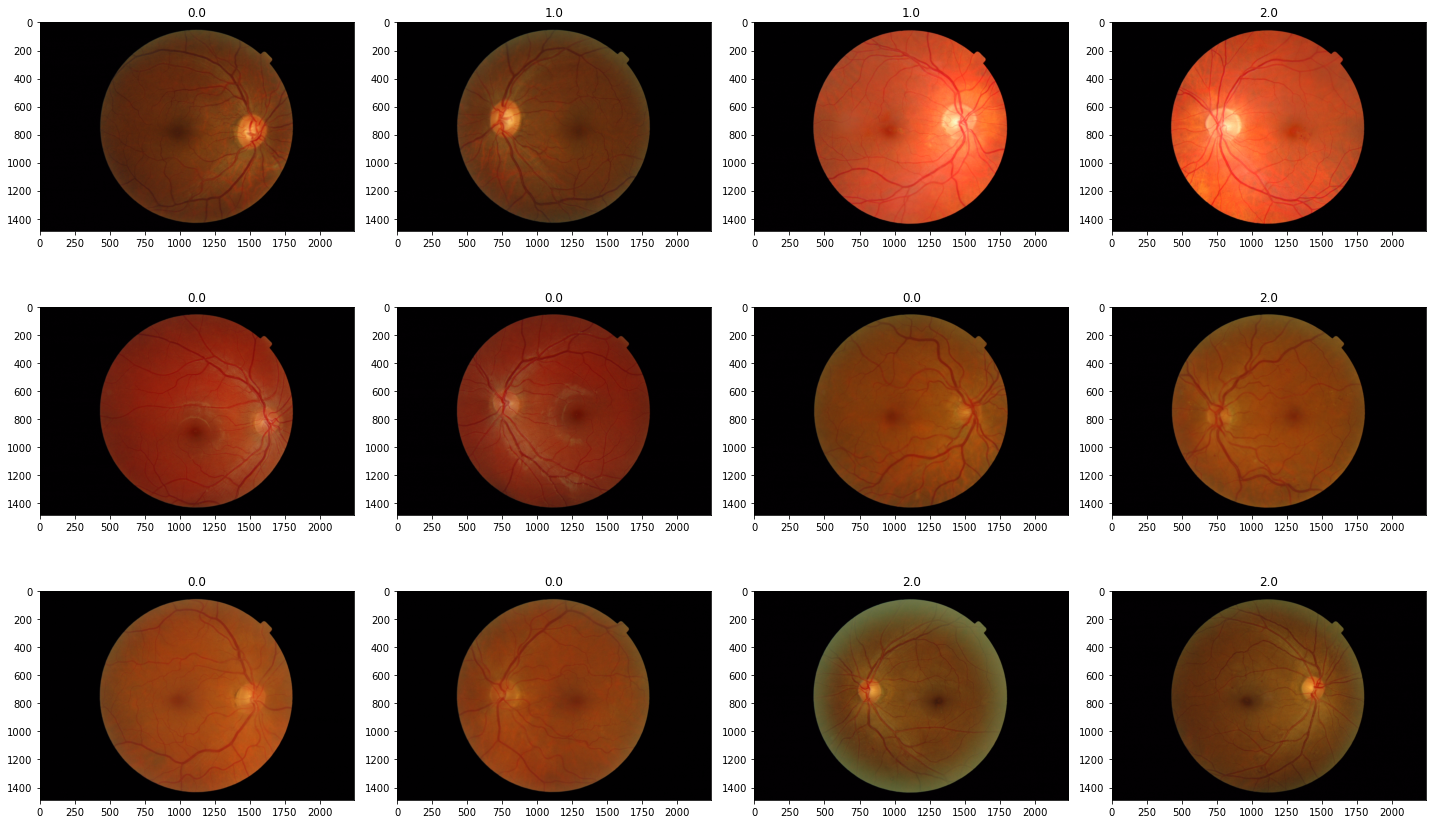

In [5]:
def display_samples(df, columns=4, rows=3):
    fig = plt.figure(figsize=(5*columns, 4*rows))
    
    for i in range(columns*rows):
        image_path = df.loc[i, 'image_id']
        image_id = df.loc[i, 'adjudicated_dr_grade']
        img = cv2.imread(f'./Messidor/IMAGES/{image_path}')
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
        
    plt.tight_layout()
    
display_samples(label_df)

#### Resizing images

In [6]:
def preprocess_image(image_path, desired_size=224):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.BILINEAR)
    
    return im

N = label_df.shape[0]
images_df= np.empty((N, 224, 224, 3), dtype=np.float32)

for i, image_id in enumerate(tqdm(label_df['image_id'])):
    images_df[i,:,:,:] = preprocess_image(f'./Messidor/IMAGES/{image_id}')

100%|██████████| 1748/1748 [03:27<00:00,  8.43it/s]


#### Image gradient analysis

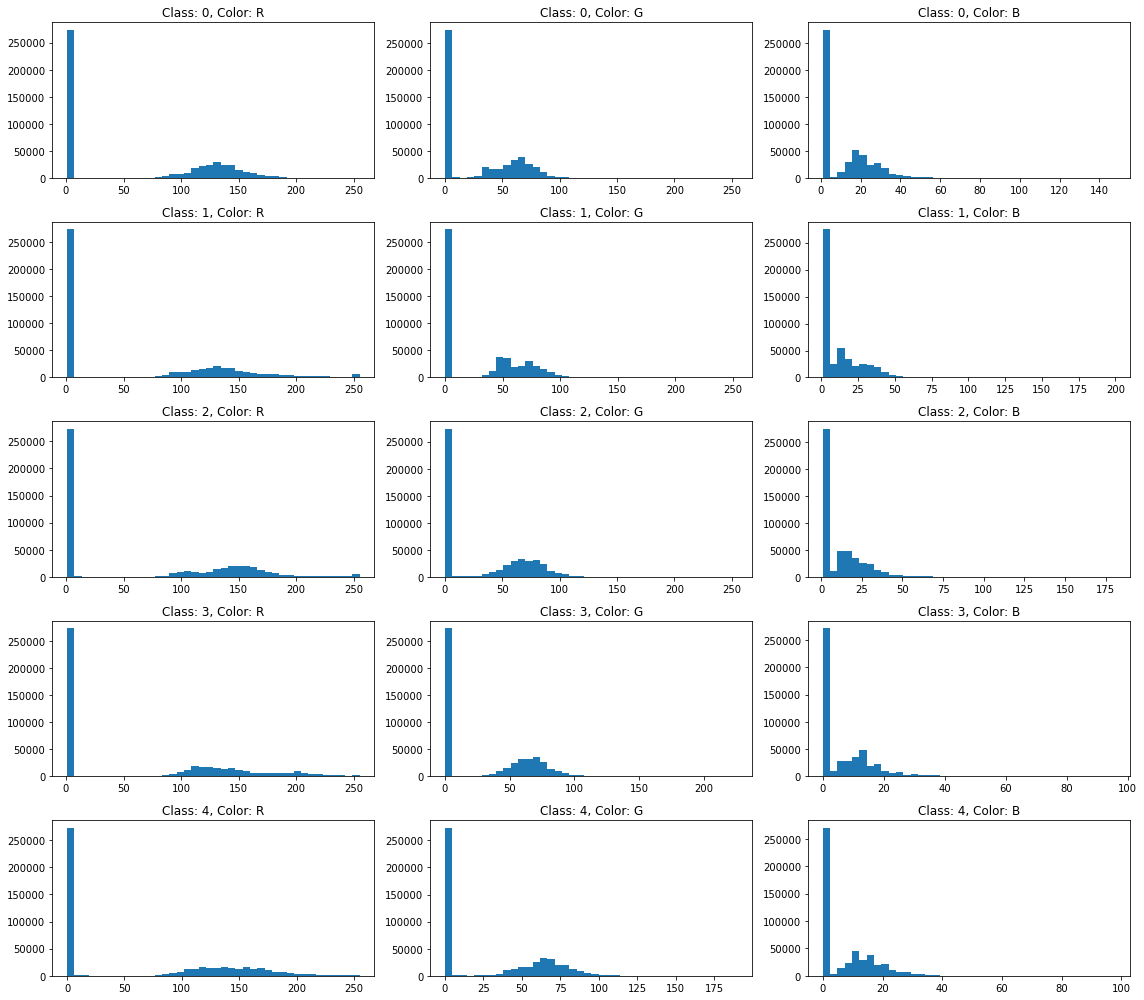

In [10]:
def plot_color_hist(df):
    DR_classes = [0,1,2,3,4]
    fig,ax = plt.subplots(nrows=len(DR_classes), ncols=3,figsize=(16, 14))
    # Iterate through every class
    for i,dr_class in enumerate(DR_classes):
        temp_df = images_df[label_df['adjudicated_dr_grade'] == dr_class][0:10,:,:,:]
        # Calculate mean for RGB
        for j,color in enumerate(['R','G','B']):
            ax[i,j].hist(temp_df[:,:,:,j].flatten(),bins=40)
            ax[i,j].set_title("Class: " + str(dr_class) + ", Color: " + str(color))
            # Plot them
    plt.tight_layout()
    plt.show()
plot_color_hist(images_df)